In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('winequalityN.csv')

In [6]:
 df['type']=df['type'].map({'red':1,'white':0})

converting type of wine to numerical value 

In [7]:
df['type'] = (df['type']).astype(float)


In [8]:
df['quality'] = (df['quality']).astype(float)


In [10]:
df.fillna(df['pH'].mean(),inplace=True)

filling empty values with the mean

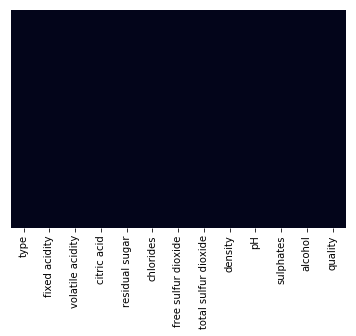

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

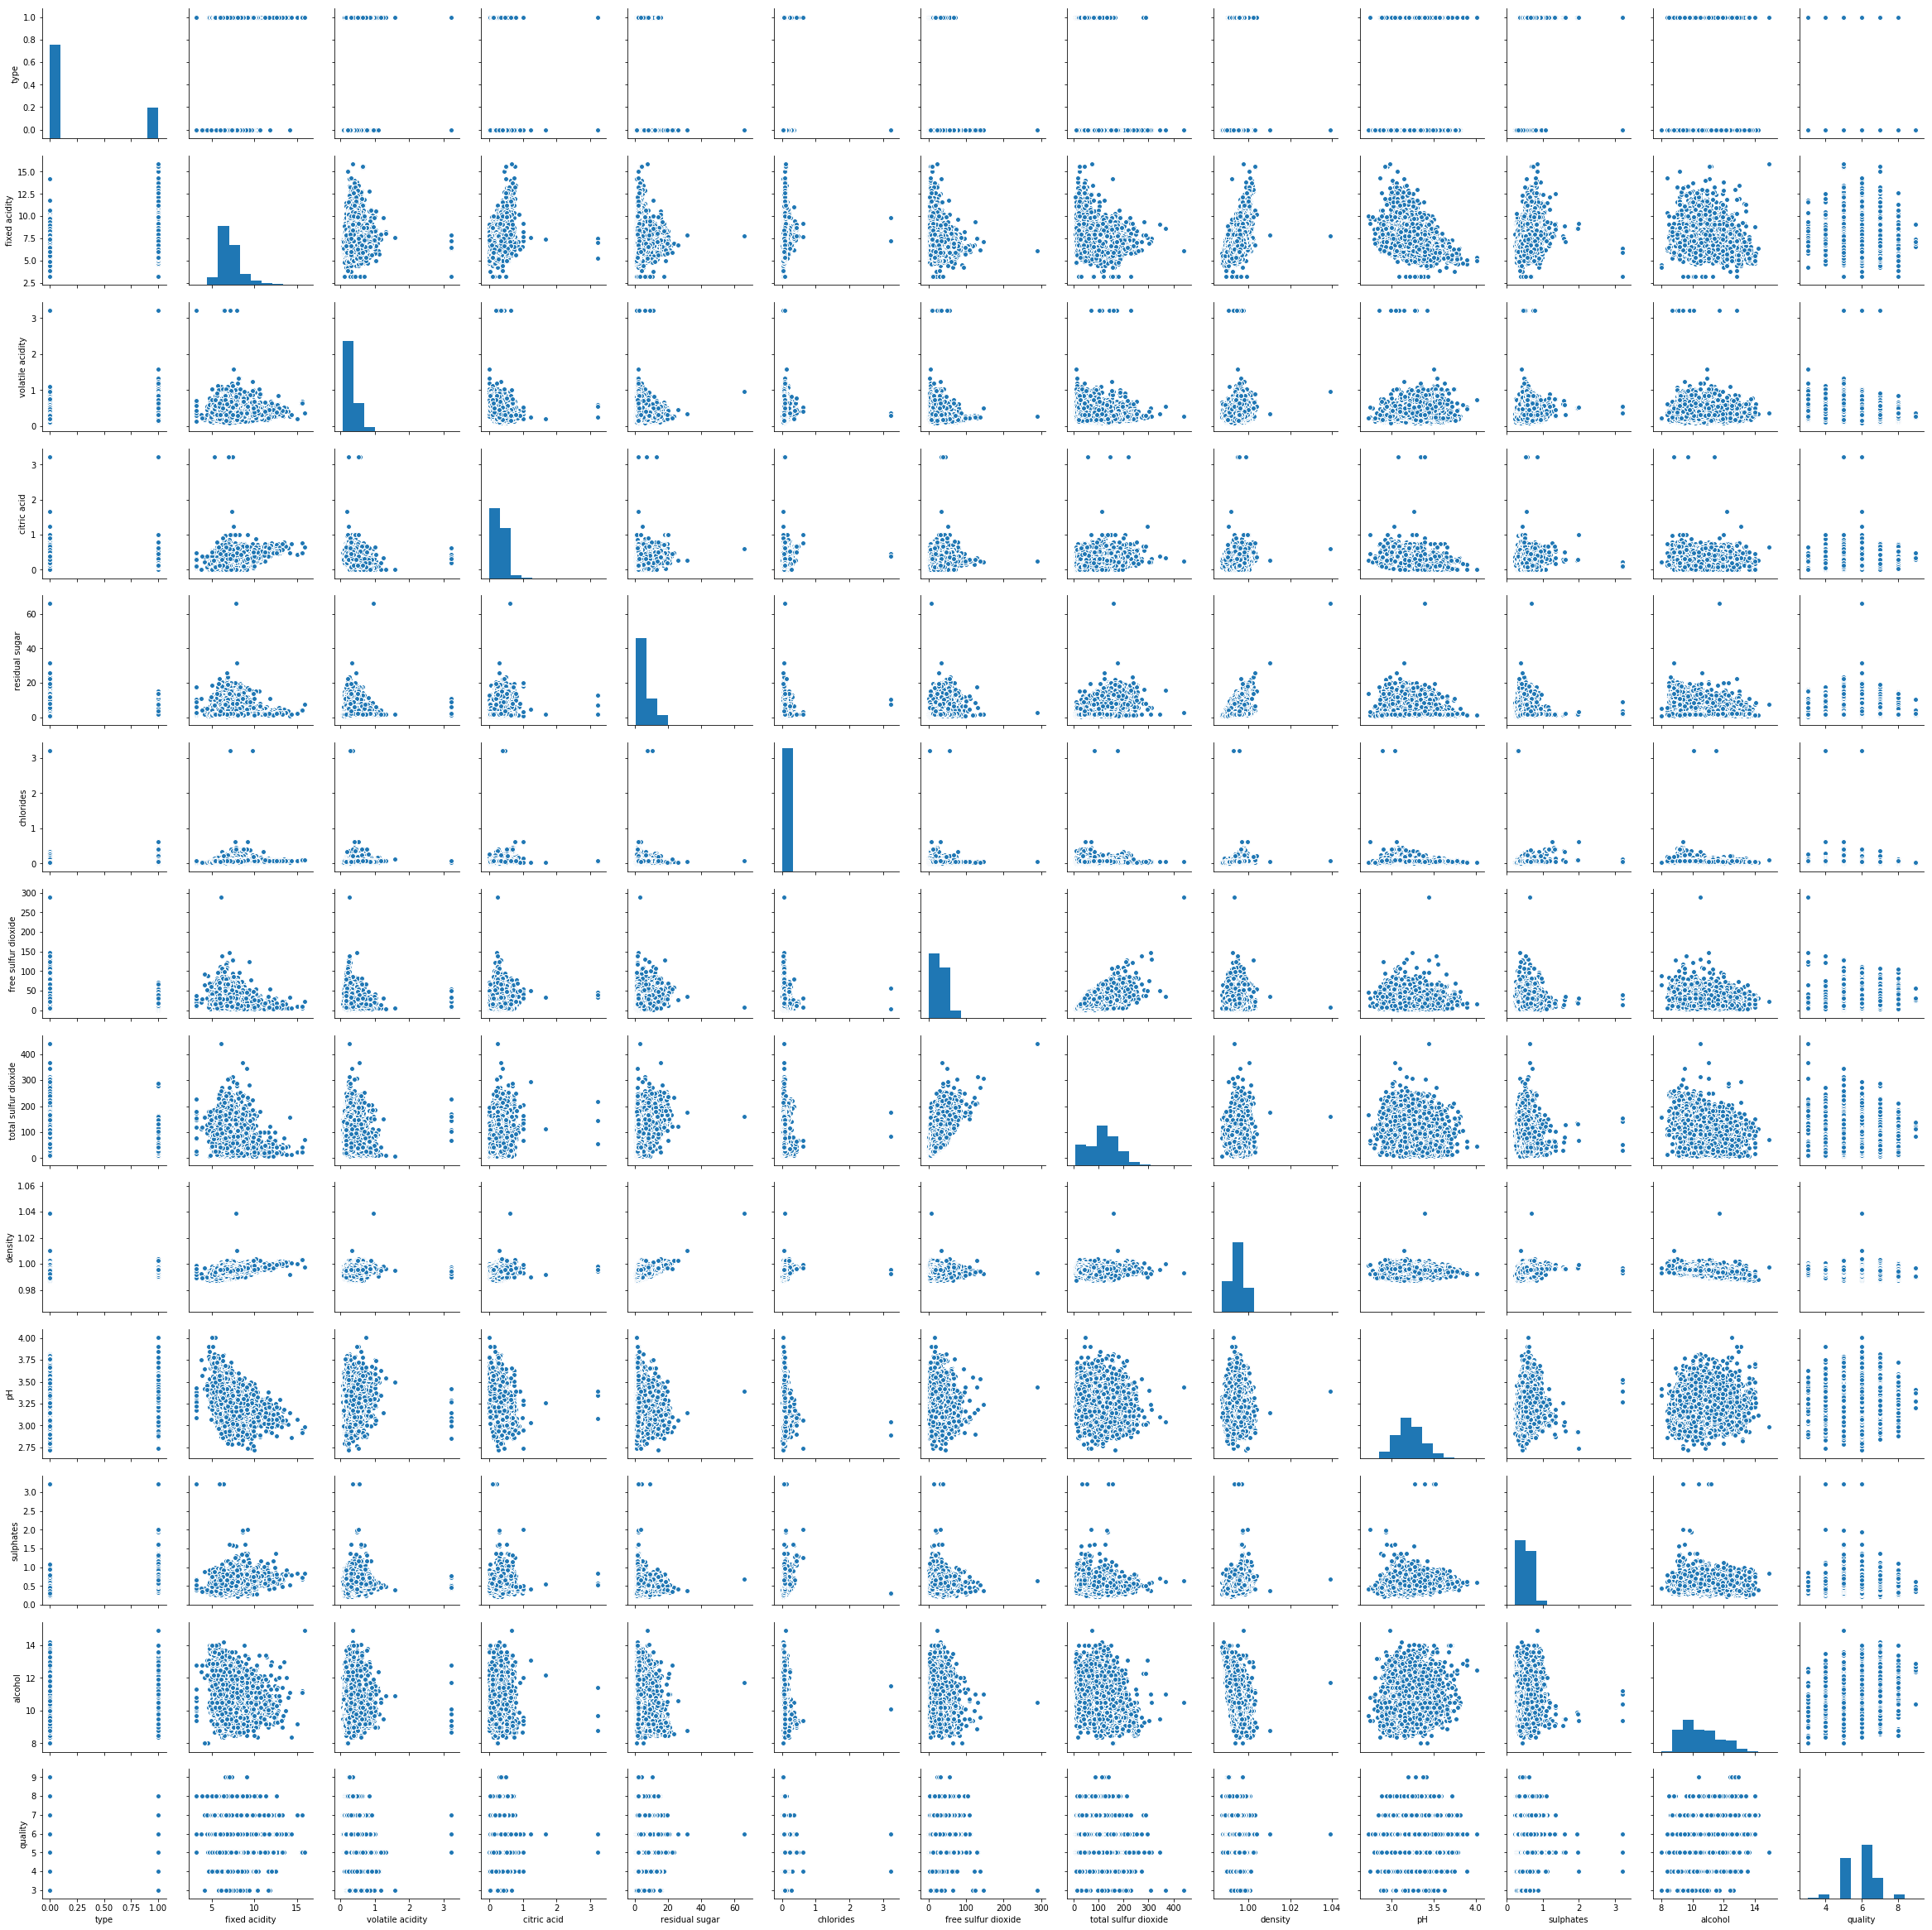

In [12]:
sns.pairplot(df)

plotting a heat map below to check correlation between variables

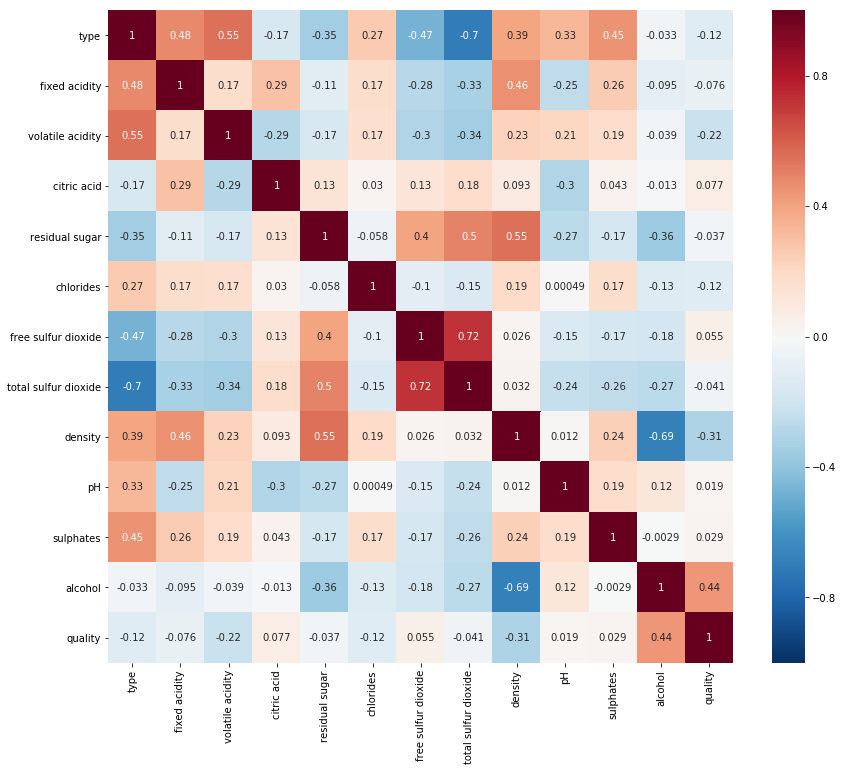

In [14]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

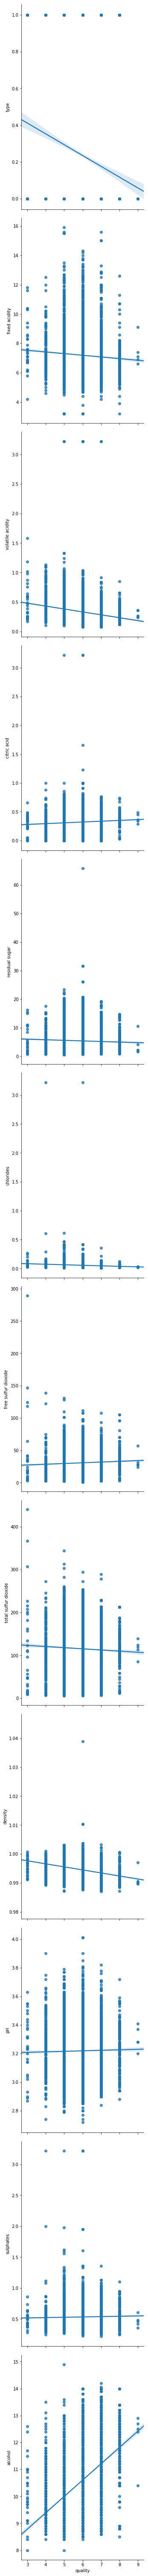

In [16]:
sns.pairplot(df,y_vars=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],x_vars='quality',size=7,aspect=0.7,kind='reg')

plotting graphs between feauture and target vector to analyse their relation

/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


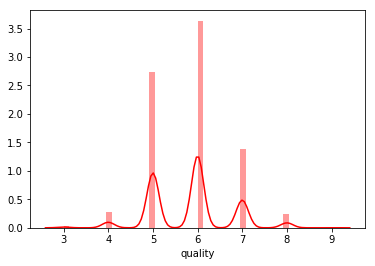

In [17]:
sns.distplot(df['quality'],color='red')

In [18]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.210425,0.343236,0.320061,5.443641,0.057015,30.525319,115.744574,0.994697,3.218395,0.532870,10.491801,5.818378
std,0.430779,1.305198,0.193052,0.158030,4.757552,0.065614,17.749400,56.521855,0.002999,0.160637,0.163020,1.192712,0.873255
min,0.000000,3.218395,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,3.218395,3.218395,65.800000,3.218395,289.000000,440.000000,1.038980,4.010000,3.218395,14.900000,9.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null float64
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null float64
dtypes: float64(13)
memory usage: 659.9 KB


all the features are of float type

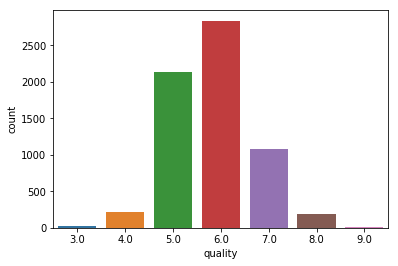

In [21]:
sns.countplot(x='quality', data=df)

assigning the quality of wines 3 categories , good(>7) , average(between 5 and 7 , 5 included) and bad(less than 4)

In [24]:

conditions  = [
    (df['quality'] >= 7),
    (df['quality'] <= 4)
]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating, default='average')
df.rating.value_counts()

average    4974
good       1277
bad         246
Name: rating, dtype: int64

In [25]:
df.groupby('rating').mean()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,,
average,0.265179,7.235759,0.349887,0.318630,5.659433,0.059317,30.766285,117.744069,0.995113,3.215273,0.531487,10.265275,5.570165
bad,0.256098,7.357724,0.465163,0.273374,4.273984,0.075054,22.902439,105.701220,0.994944,3.234797,0.516091,10.184350,3.878049
good,0.169930,7.083374,0.293839,0.334628,4.828440,0.044576,31.055208,109.891151,0.993027,3.227398,0.541488,11.433359,7.158966


In [26]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.077286
free sulfur dioxide     0.055463
sulphates               0.028722
pH                      0.019356
residual sugar         -0.036931
total sulfur dioxide   -0.041385
fixed acidity          -0.075771
type                   -0.119323
chlorides              -0.121122
volatile acidity       -0.222768
density                -0.305858
Name: quality, dtype: float64

We can osee that, the 'alcohol, sulphates, citric acid & fixed acidity' have maximum corelation with response variable 'quality' and so we analyse these further

[Text(0,0.5,'Alcohol Percent'), Text(0.5,0,'Wine Quality')]

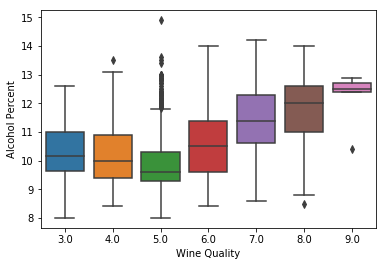

In [28]:
box = sns.boxplot(x="quality", y='alcohol', data = df)
box.set(xlabel='Wine Quality', ylabel='Alcohol Percent')

as alcohol % increases quality is better

[Text(0,0.5,'Citric Acid'), Text(0.5,0,'Wine Ratings')]

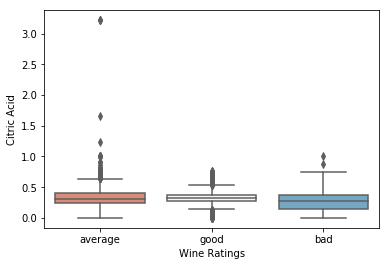

In [38]:
box2 = sns.boxplot(x="rating", y='citric acid', data = df,palette='RdBu')
box2.set(xlabel='Wine Ratings', ylabel='Citric Acid')

as citric acid increases quality is better

[Text(0,0.5,'Sulphates'), Text(0.5,0,'Wine Ratings')]

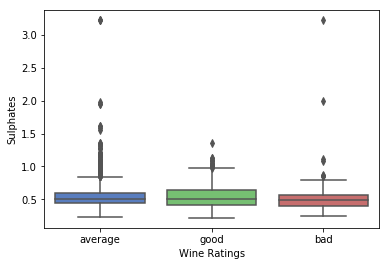

In [54]:
box3 = sns.boxplot(x="rating", y='sulphates', data = df,palette='muted')
box3.set(xlabel='Wine Ratings', ylabel='Sulphates')

as sulphates increases quality is better

/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


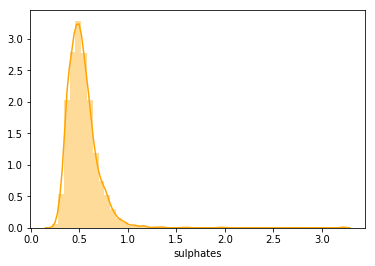

In [50]:
sns.distplot(df['sulphates'],color='orange')

[Text(0,0.5,'free sulfur dioxide'), Text(0.5,0,'Wine Ratings')]

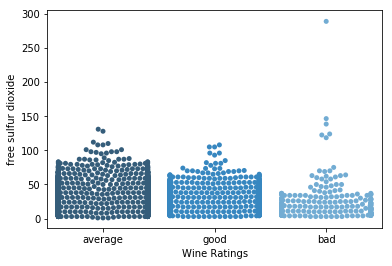

In [59]:
box3 = sns.swarmplot(x="rating", y='free sulfur dioxide', data = df,palette='Blues_d')
box3.set(xlabel='Wine Ratings', ylabel='free sulfur dioxide')

[Text(0,0.5,'pH'), Text(0.5,0,'Wine Ratings')]

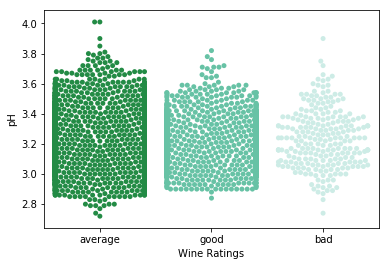

In [58]:
box3 = sns.swarmplot(x="rating", y='pH', data = df,palette='BuGn_r')
box3.set(xlabel='Wine Ratings', ylabel='pH')

as free sulphur dioxide and pH  increases quality becomes better

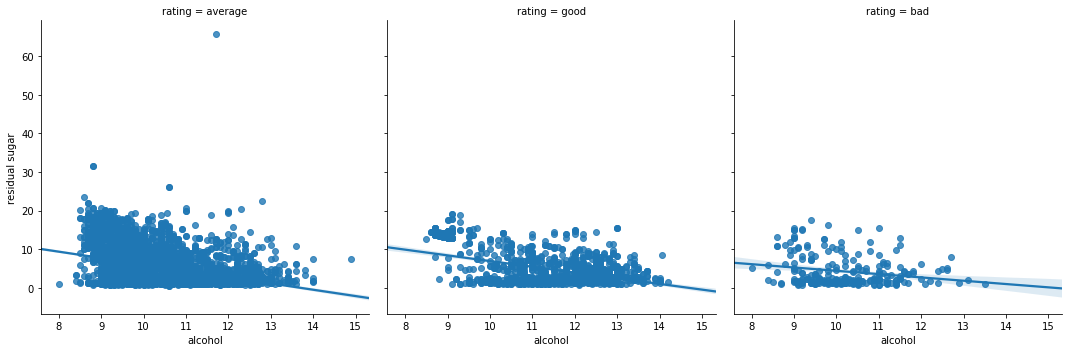

In [72]:
sns.lmplot(x = 'alcohol', y = 'residual sugar', col = 'rating', data = df)

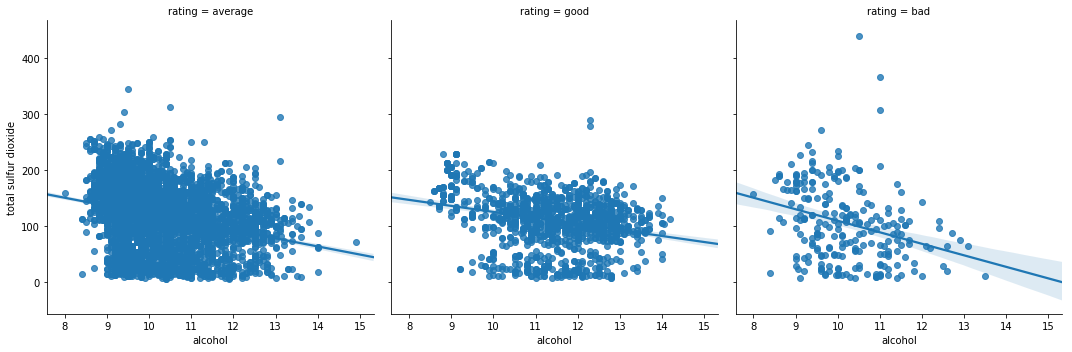

In [70]:
sns.lmplot(x = 'alcohol', y = 'total sulfur dioxide', col = 'rating', data = df)

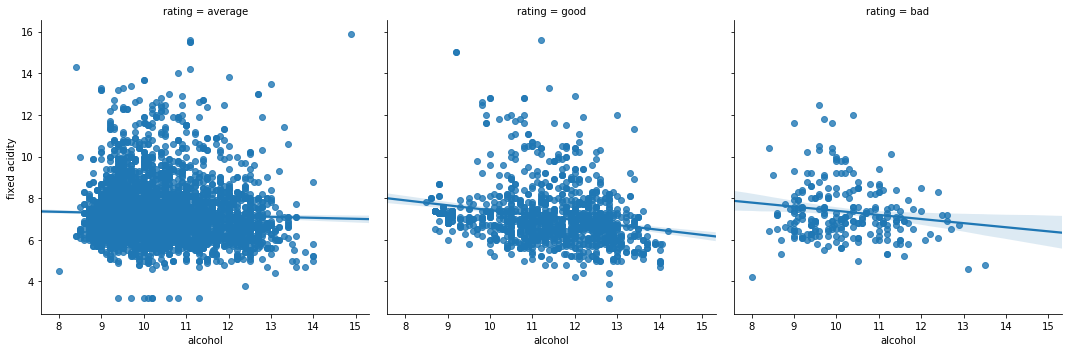

In [75]:
sns.lmplot(x = 'alcohol', y = 'fixed acidity', col = 'rating', data = df)

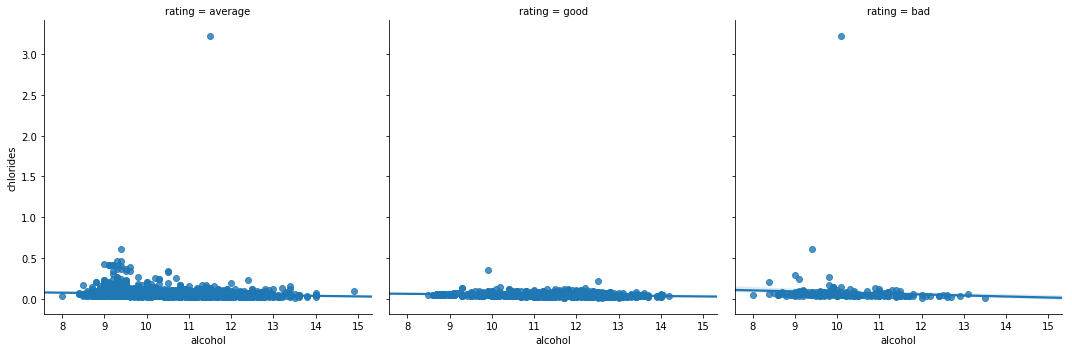

In [74]:
sns.lmplot(x = 'alcohol', y = 'chlorides', col = 'rating', data = df)

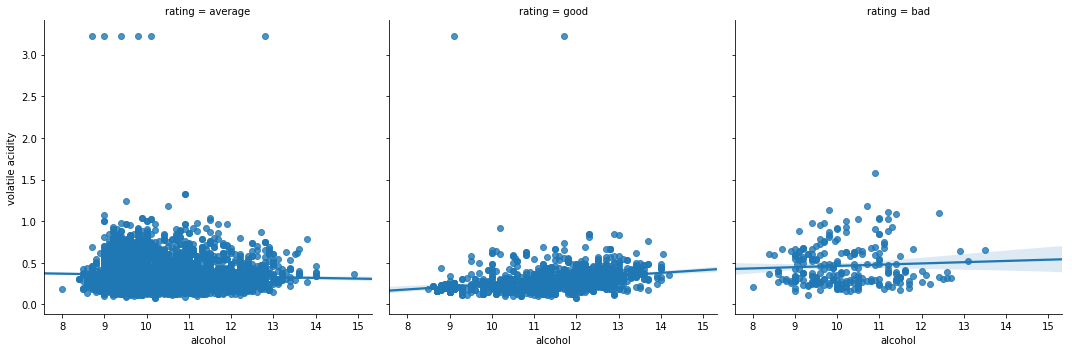

In [76]:
sns.lmplot(x = 'alcohol', y = 'volatile acidity', col = 'rating', data = df)

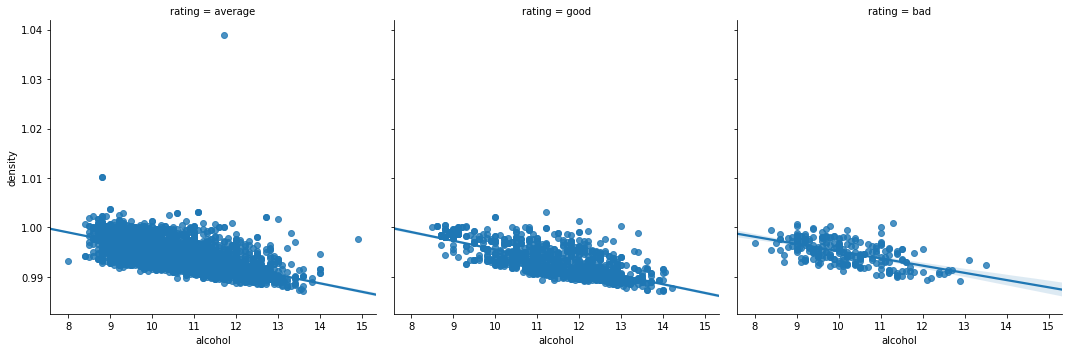

In [77]:
sns.lmplot(x = 'alcohol', y = 'density', col = 'rating', data = df)

using the lmplot feature of seaborm, we have analysed that when residual sugar, total sulfuric acid,chlorides , density, volatile acidity,fixed acidity, decrease, the amount of alcohol is more which means that the quality of wine is better

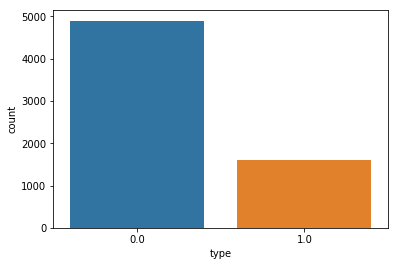

In [79]:
sns.countplot(x='type',data=df)

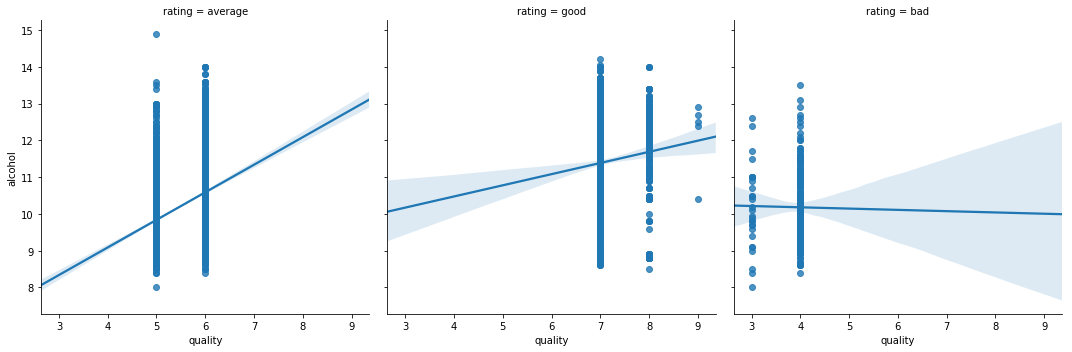

In [89]:
sns.lmplot(x = 'quality', y = 'alcohol', col = 'rating', data = df)

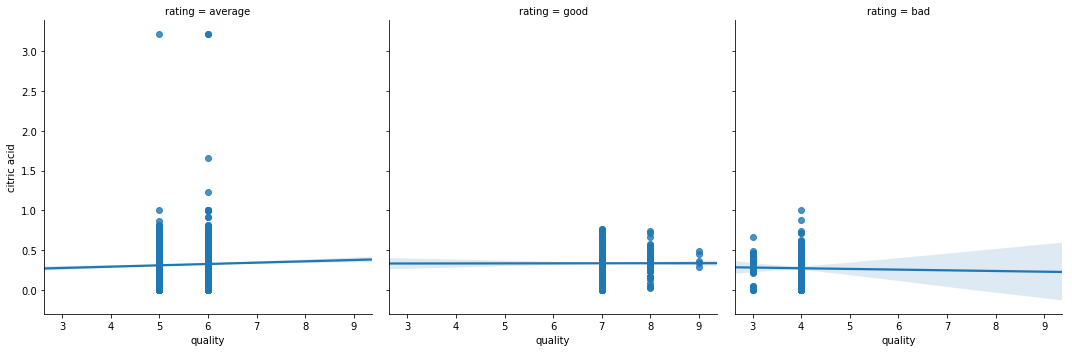

In [90]:
sns.lmplot(x = 'quality', y = 'citric acid', col = 'rating', data = df)

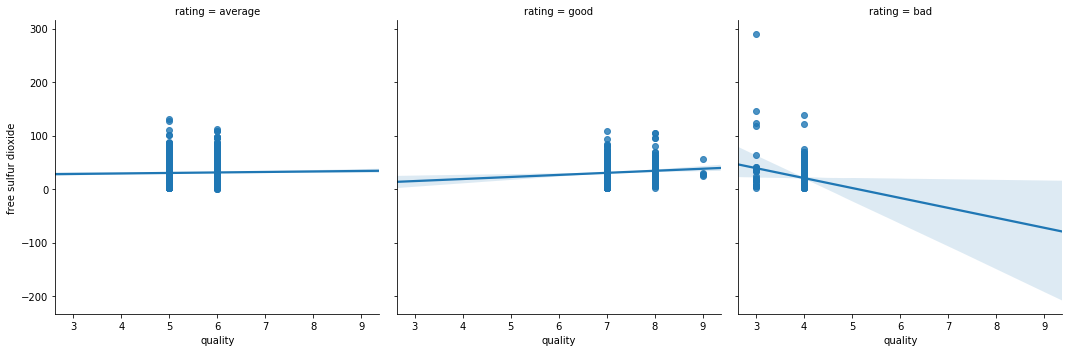

In [87]:
sns.lmplot(x = 'quality', y = 'free sulfur dioxide', col = 'rating', data = df)

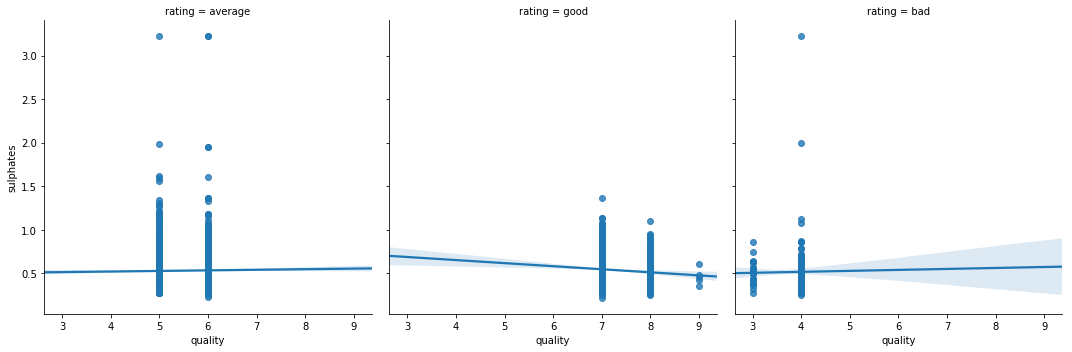

In [88]:
sns.lmplot(x = 'quality', y = 'sulphates', col = 'rating', data = df)

here we again analysed the features of alcohol,free sulfuric acid,citric acid, sulphates and came to the conclusion that when these are increased, the quality of wine also increases.

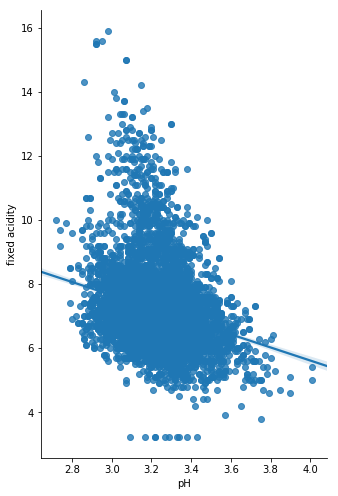

In [100]:
sns.pairplot(df,y_vars='fixed acidity',x_vars='pH',size=7,aspect=0.7,kind='reg')

here we came to know that as fixed acidity levels increase, the pH levels drop. low pH is indicator of high acidity

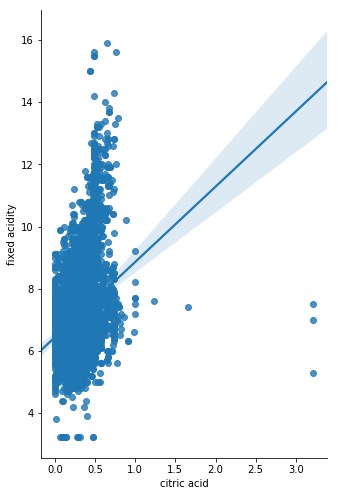

In [103]:
sns.pairplot(df,y_vars='fixed acidity',x_vars='citric acid',size=7,aspect=0.7,kind='reg')

as citric acid increases , so does fixed acidity

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
type                    6497 non-null float64
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null float64
rating                  6497 non-null object
dtypes: float64(13), object(1)
memory usage: 710.7+ KB


In [105]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'rating'],
      dtype='object')

In [135]:
cols = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = df[cols]

y = df['quality']

In [136]:
print(X.shape)
print(y.shape)

(6497, 12)
(6497,)


# Multiple regression

# train_test_split


splitting data into traing and testing set to avoid overfitting

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [139]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4352, 12)
(4352,)
(2145, 12)
(2145,)


In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [142]:
print(linreg.intercept_)
print(linreg.coef_)

119.06841864045097
[ 2.03512549e-01  1.01377822e-01 -7.47665717e-01  1.30330641e-01
  6.62546866e-02 -6.49631230e-01  7.18246996e-03 -2.10112325e-03
 -1.18906320e+02  5.18972565e-01  7.24556962e-01  1.99942461e-01]


In [145]:
list(zip(cols,linreg.coef_))

[('type', 0.20351254850920178),
 ('fixed acidity', 0.10137782196570287),
 ('volatile acidity', -0.7476657166527075),
 ('citric acid', 0.13033064066719335),
 ('residual sugar', 0.06625468656054719),
 ('chlorides', -0.6496312303374701),
 ('free sulfur dioxide', 0.0071824699600735445),
 ('total sulfur dioxide', -0.0021011232502188247),
 ('density', -118.9063202751459),
 ('pH', 0.5189725645890142),
 ('sulphates', 0.7245569619312804),
 ('alcohol', 0.19994246051074044)]

In [146]:
y_pred = linreg.predict(X_test)

In [148]:
from sklearn import metrics

In [149]:
print(metrics.mean_absolute_error(y_test,y_pred))

0.5690016908136458


In [151]:
print(metrics.mean_squared_error(y_test,y_pred))

0.5348352812569848


In [152]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.731324333833481


In [154]:
from sklearn.cross_validation import cross_val_score

In [156]:
linreg1 = LinearRegression()
scores = cross_val_score(linreg1,X,y,cv=10,scoring='mean_squared_error')
print(scores)

[-0.62788054 -0.83745935 -0.56519026 -0.59951162 -0.56398711 -0.55658075
 -0.52295517 -0.45162977 -0.47704872 -0.47160213]


In [178]:
mse = -scores
print(mse)
print(mse.mean())

[0.62788054 0.83745935 0.56519026 0.59951162 0.56398711 0.55658075
 0.52295517 0.45162977 0.47704872 0.47160213]
0.5673845419439487


In [158]:
rmse = np.sqrt(mse)
print(rmse)

[0.79238913 0.91512805 0.75179137 0.77428136 0.75099075 0.7460434
 0.72315639 0.67203406 0.69068713 0.68673294]


In [159]:
print(rmse.mean())

0.7503234581673033


In [161]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [162]:
cols1 = ['alcohol','citric acid','free sulfur dioxide','sulphates','pH']

X1 = df[cols1]

y1 = df['quality']

here we use only those features which had a positive correlation with the quality

In [171]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [172]:
linreg2 = LinearRegression()
linreg2.fit(X_train1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
print(linreg.intercept_)
print(linreg.coef_)

119.06841864045097
[ 2.03512549e-01  1.01377822e-01 -7.47665717e-01  1.30330641e-01
  6.62546866e-02 -6.49631230e-01  7.18246996e-03 -2.10112325e-03
 -1.18906320e+02  5.18972565e-01  7.24556962e-01  1.99942461e-01]


In [174]:
list(zip(cols1,linreg.coef_))

[('alcohol', 0.20351254850920178),
 ('citric acid', 0.10137782196570287),
 ('free sulfur dioxide', -0.7476657166527075),
 ('sulphates', 0.13033064066719335),
 ('pH', 0.06625468656054719)]

In [175]:
y_pred1 = linreg2.predict(X_test1)

In [176]:
print(metrics.mean_absolute_error(y_test1,y_pred1))
print(metrics.mean_squared_error(y_test1,y_pred1))
print(np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))

0.5962742629449544
0.5694506903813856
0.754619566656859


Conclusion

in the train test split method , the mean absolute erroe is 0.56 , mean squared error is 0.53 and root men squared error is 0.73. usually rmse is the best parameter as it s interpretable in the y units but as there is a difference of arounf 0.2 between rmse and mse , it maybe a better choice to use mse which was calculated using the train_test_split method.